# UoG-DA_Group28 Jupyter Notebook: Classification - Decision Tree

<hr>

## <u> Initial Setup </u>

In [17]:
from utils import *

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the Datasets
dataset_1 = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")
dataset_2 = load_from_pickle("cir_ncir_pca.pkl", "./pickled_data_sets")

## <u> Training and Analysis </u>

### <b> Dataset: cir_ncir_agg </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [18]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the decision tree model based on several max depths (`maxdepths`) for both 70:30 and 80:20 dataset splits in order to obtain the paramteres that returns the most optimal results

Max Depth:  2
Training Accuracy:  0.8517687074829932
Testing Accuracy:  0.8535714285714285


Max Depth:  3
Training Accuracy:  0.8580272108843537
Testing Accuracy:  0.858015873015873


Max Depth:  4
Training Accuracy:  0.8747619047619047
Testing Accuracy:  0.8693650793650793


Max Depth:  5
Training Accuracy:  0.8879591836734694
Testing Accuracy:  0.8802380952380953


Max Depth:  6
Training Accuracy:  0.8965986394557823
Testing Accuracy:  0.8892063492063492


Max Depth:  7
Training Accuracy:  0.9091836734693878
Testing Accuracy:  0.8949206349206349


Max Depth:  8
Training Accuracy:  0.9175510204081633
Testing Accuracy:  0.9024603174603174


Max Depth:  9
Training Accuracy:  0.9258163265306123
Testing Accuracy:  0.9008730158730158


Max Depth:  10
Training Accuracy:  0.9350680272108843
Testing Accuracy:  0.8981746031746032


Max Depth:  15
Training Accuracy:  0.9812925170068028
Testing Accuracy:  0.8876984126984127


Max Depth:  20
Training Accuracy:  0.996156462585034
Testing Accuracy

Text(0, 0.5, 'Accuracy')

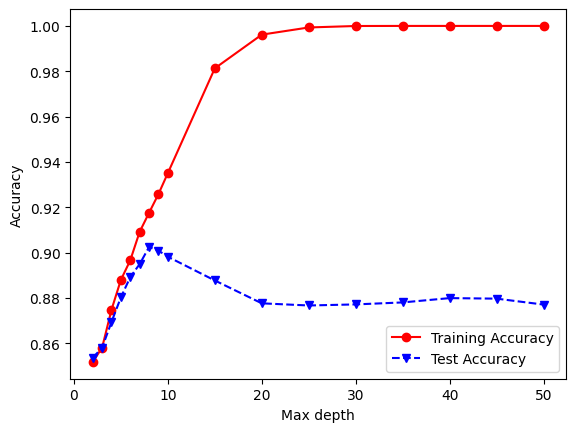

In [19]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAccuracy[index] = accuracy_score(Y_train_70_30, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_70_30, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Max Depth:  2
Training Accuracy:  0.852202380952381
Testing Accuracy:  0.8527380952380952


Max Depth:  3
Training Accuracy:  0.8583035714285714
Testing Accuracy:  0.856904761904762


Max Depth:  4
Training Accuracy:  0.8745238095238095
Testing Accuracy:  0.8722619047619048


Max Depth:  5
Training Accuracy:  0.8838095238095238
Testing Accuracy:  0.8759523809523809


Max Depth:  6
Training Accuracy:  0.8963690476190476
Testing Accuracy:  0.8864285714285715


Max Depth:  7
Training Accuracy:  0.9080654761904762
Testing Accuracy:  0.893095238095238


Max Depth:  8
Training Accuracy:  0.9158928571428572
Testing Accuracy:  0.898452380952381


Max Depth:  9
Training Accuracy:  0.9237202380952381
Testing Accuracy:  0.8985714285714286


Max Depth:  10
Training Accuracy:  0.9339880952380952
Testing Accuracy:  0.8970238095238096


Max Depth:  15
Training Accuracy:  0.9777083333333333
Testing Accuracy:  0.8820238095238095


Max Depth:  20
Training Accuracy:  0.9951785714285715
Testing Accuracy: 

Text(0, 0.5, 'Accuracy')

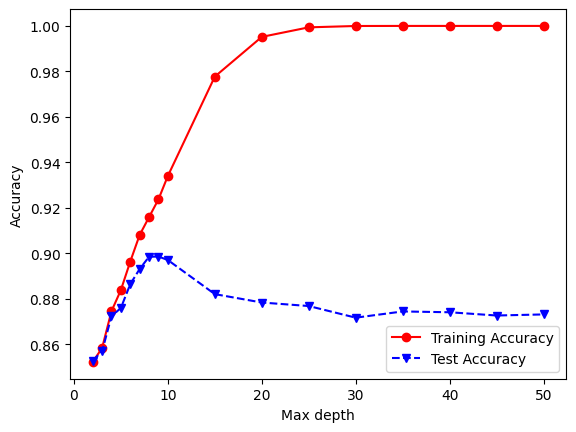

In [20]:
trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAccuracy[index] = accuracy_score(Y_train_80_20, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_80_20, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe an inflection point for the 'Test Accuracy' line at `maxdepths = 8` and `maxdepths = 9` respectively, with subsequent `maxdepths` values showing diminishing returns, indicating model overfitting.

We will this use this max-depth as the optimal parameter for our Decision Tree models for both 70:30 and 80:20 splits for consistency
- `maxdepths` : `8`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [21]:
MAX_DEPTH = 8

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Decision Tree trained with cir_ncir_pca_70_30:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

Decision Tree trained with cir_ncir_pca_70_30:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9174829931972789
Testing Accuracy:  0.903015873015873




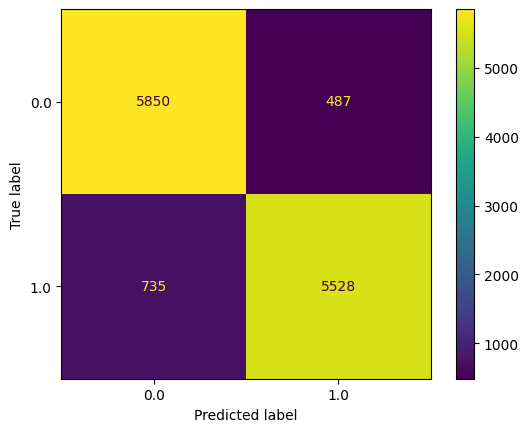

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      6337
         1.0       0.92      0.88      0.90      6263

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [22]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [23]:
clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Decision Tree trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

Decision Tree trained with cir_ncir_pca_80_20:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9158630952380953
Testing Accuracy:  0.8982142857142857




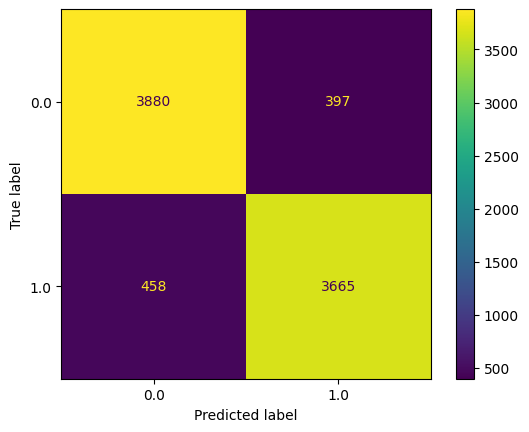

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4277
         1.0       0.90      0.89      0.90      4123

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [24]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

### <b> Dataset: cir_ncir_pca </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [45]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the decision tree model based on several max depths (`maxdepths`) for both 70:30 and 80:20 dataset splits in order to obtain the paramteres that returns the most optimal results

Max Depth:  2
Training Accuracy:  0.8517687074829932
Testing Accuracy:  0.8535714285714285


Max Depth:  3
Training Accuracy:  0.8574149659863946
Testing Accuracy:  0.856904761904762


Max Depth:  4
Training Accuracy:  0.8720068027210884
Testing Accuracy:  0.8674603174603175


Max Depth:  5
Training Accuracy:  0.887517006802721
Testing Accuracy:  0.8790476190476191


Max Depth:  6
Training Accuracy:  0.8945918367346939
Testing Accuracy:  0.8871428571428571


Max Depth:  7
Training Accuracy:  0.9080272108843538
Testing Accuracy:  0.8943650793650794


Max Depth:  8
Training Accuracy:  0.9170068027210885
Testing Accuracy:  0.8986507936507937


Max Depth:  9
Training Accuracy:  0.9255442176870748
Testing Accuracy:  0.8955555555555555


Max Depth:  10
Training Accuracy:  0.936156462585034
Testing Accuracy:  0.8913492063492063


Max Depth:  15
Training Accuracy:  0.9822108843537415
Testing Accuracy:  0.8773015873015872


Max Depth:  20
Training Accuracy:  0.9942176870748299
Testing Accuracy:

Text(0, 0.5, 'Accuracy')

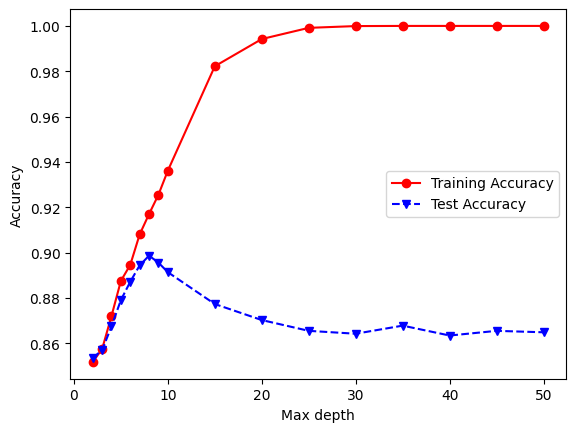

In [26]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAccuracy[index] = accuracy_score(Y_train_70_30, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_70_30, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Max Depth:  2
Training Accuracy:  0.852202380952381
Testing Accuracy:  0.8527380952380952


Max Depth:  3
Training Accuracy:  0.8576488095238095
Testing Accuracy:  0.8557142857142858


Max Depth:  4
Training Accuracy:  0.8720238095238095
Testing Accuracy:  0.8697619047619047


Max Depth:  5
Training Accuracy:  0.8835119047619048
Testing Accuracy:  0.8745238095238095


Max Depth:  6
Training Accuracy:  0.8949107142857143
Testing Accuracy:  0.8835714285714286


Max Depth:  7
Training Accuracy:  0.9074404761904762
Testing Accuracy:  0.8913095238095238


Max Depth:  8
Training Accuracy:  0.9157440476190476
Testing Accuracy:  0.895


Max Depth:  9
Training Accuracy:  0.9253571428571429
Testing Accuracy:  0.8925


Max Depth:  10
Training Accuracy:  0.9356845238095238
Testing Accuracy:  0.8940476190476191


Max Depth:  15
Training Accuracy:  0.9803273809523809
Testing Accuracy:  0.878452380952381


Max Depth:  20
Training Accuracy:  0.996547619047619
Testing Accuracy:  0.8682142857142857


Ma

Text(0, 0.5, 'Accuracy')

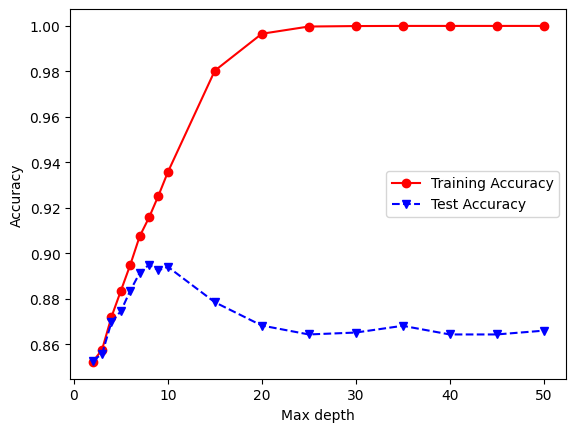

In [27]:
trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAccuracy[index] = accuracy_score(Y_train_80_20, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_80_20, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From both 70:30 and 80:20 splits, we can observe an inflection point for the 'Test Accuracy' line at `maxdepths = 8`, with subsequent `maxdepths` values showing diminishing returns, indicating model overfitting.

We will this use this max-depth as the optimal parameter for our Decision Tree model
- `max_depth` : `8`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [28]:
MAX_DEPTH = 8

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Decision Tree trained with cir_ncir_pca_70_30:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

Decision Tree trained with cir_ncir_pca_70_30:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9170068027210885
Testing Accuracy:  0.8991269841269841




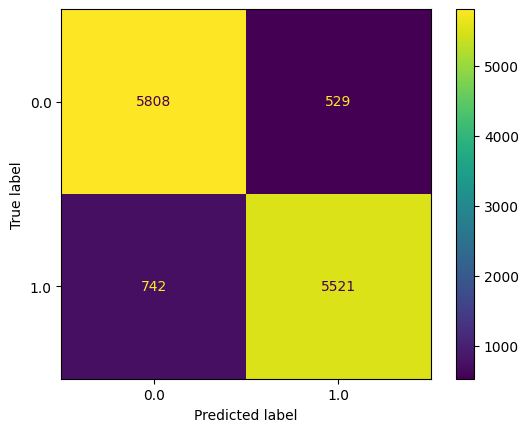

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      6337
         1.0       0.91      0.88      0.90      6263

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [29]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [30]:
clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Decision Tree trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

Decision Tree trained with cir_ncir_pca_80_20:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9157440476190476
Testing Accuracy:  0.8941666666666667




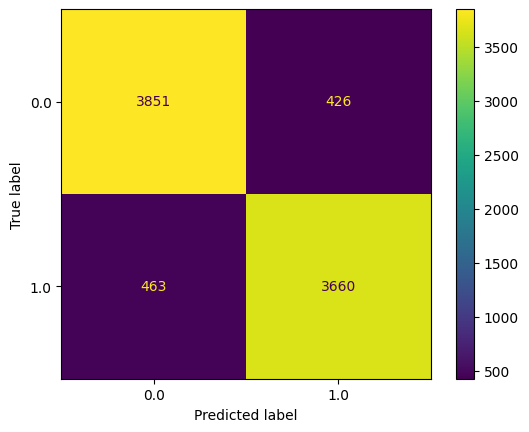

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4277
         1.0       0.90      0.89      0.89      4123

    accuracy                           0.89      8400
   macro avg       0.89      0.89      0.89      8400
weighted avg       0.89      0.89      0.89      8400



In [31]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

#### Conclusion

We are going to select the model trained with the '70:30 training:testing split cir_ncir_agg' dataset with a 'max depth = 8' as it provides us with the (marginally) highest training and testing accuracy. This model will be saved to a pickle file for later usage.

In [38]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Decision Tree trained with cir_ncir_agg_70_30:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

save_to_pickle('dt_cir_ncir_agg_70_30', './pickled_models' , clf)

Decision Tree trained with cir_ncir_agg_70_30:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9175170068027211
Testing Accuracy:  0.9023015873015873




<hr>

# <u> Appendum </u>

For the sake of analysis, we will also need to export the model trained with the `cir_ncir_pca_70_30` dataset

In [44]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

MAX_DEPTH = 8

clf1 = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf1 = clf1.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf1.predict(X_train_70_30)
Y_predTest = clf1.predict(X_test_70_30)
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

save_to_pickle('dt_cir_ncir_pca_70_30', './pickled_models' , clf1)

Max Depth:  8
Training Accuracy:  0.9170748299319728
Testing Accuracy:  0.898968253968254




<hr>

# <u> References </u>

[1] Google. (n.d.). Classification: Accuracy, recall, precision, and related metrics. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall (accessed Mar. 16, 2025) <br>
[2] Hyperskill. (n.d.). https://hyperskill.org/learn/step/29339 (accessed Mar. 16, 2025) <br>
